### Step1

UNDERSTAND DATA 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Employee_Hopping.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [7]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

### Step2

EXTRACT X AND Y


In [8]:
X = df.drop(['Attrition'],axis=1)
y = df.Attrition

### Step 3


FEATURE ENGINEERING


In [9]:
X_cat_cols = X.select_dtypes('object')
X_cat_cols.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [10]:
X = pd.get_dummies(X,columns=X_cat_cols)
X.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


### Step4

SHAPE OF X AND Y

In [11]:
print('Shape of X: ',X.shape)
print('Shape of y: ',y.shape)

Shape of X:  (1470, 55)
Shape of y:  (1470,)


### Step5


model development

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,max_features=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

### Step6


testing

In [14]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test, y_pred)

0.8775510204081632

In [15]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

         No       0.88      0.99      0.93       255
        Yes       0.71      0.13      0.22        39

avg / total       0.86      0.88      0.84       294



### Step7

feature importance value

In [16]:
rf.feature_importances_

array([0.05296231, 0.04595382, 0.03950353, 0.01687803, 0.        ,
       0.04238726, 0.02279641, 0.04042039, 0.02121518, 0.0251745 ,
       0.02360788, 0.07637466, 0.0412786 , 0.03335671, 0.02760581,
       0.00376976, 0.01854843, 0.        , 0.02878027, 0.04760894,
       0.02275717, 0.0187374 , 0.04132577, 0.02497433, 0.02434455,
       0.02837576, 0.00322911, 0.01274922, 0.00631439, 0.00180088,
       0.00744102, 0.00833031, 0.00230316, 0.00560513, 0.00564754,
       0.00670493, 0.00270566, 0.00676793, 0.00603122, 0.00617606,
       0.00192902, 0.00236962, 0.00786602, 0.00116985, 0.00221263,
       0.00072573, 0.00586897, 0.00640333, 0.00823427, 0.00515191,
       0.00660997, 0.01968246, 0.        , 0.04163281, 0.03959941])

In [17]:
pd.DataFrame(rf.feature_importances_,index=X.columns)

,0
Age,0.052962
DailyRate,0.045954
DistanceFromHome,0.039504
Education,0.016878
EmployeeCount,0.000000
EmployeeNumber,0.042387
EnvironmentSatisfaction,0.022796
HourlyRate,0.040420
JobInvolvement,0.021215
JobLevel,0.025175


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
sns.barplot(x=X.columns,y=rf.feature_importances_)
plt.show()

### Step8


visualize your RF decision tree using graphviz

In [19]:
from sklearn import tree 
with open('RFtree.dot','w') as f:
    f = tree.export_graphviz(rf.estimators_[10],out_file=f,max_depth=4,impurity=False,feature_names=X.columns.values,class_names=['Yes','No'],filled=True)

In [20]:
!type RFtree.dot

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="OverTime_Yes <= 0.5\nsamples = 721\nvalue = [978, 198]\nclass = Yes", fillcolor="#e58139cb"] ;
1 [label="Age <= 34.5\nsamples = 505\nvalue = [745, 79]\nclass = Yes", fillcolor="#e58139e4"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="StockOptionLevel <= 0.5\nsamples = 229\nvalue = [322, 54]\nclass = Yes", fillcolor="#e58139d4"] ;
1 -> 2 ;
3 [label="YearsAtCompany <= 2.5\nsamples = 95\nvalue = [110, 39]\nclass = Yes", fillcolor="#e58139a5"] ;
2 -> 3 ;
4 [label="MonthlyIncome <= 3699.5\nsamples = 33\nvalue = [24, 24]\nclass = Yes", fillcolor="#e5813900"] ;
3 -> 4 ;
5 [label="(...)", fillcolor="#C0C0C0"] ;
4 -> 5 ;
24 [label="(...)", fillcolor="#C0C0C0"] ;
4 -> 24 ;
27 [label="HourlyRate <= 34.5\nsamples = 62\nvalue = [86, 15]\nclass = Yes", fillcolor="#e58139d3"] ;
3 -> 27 ;
28 [label="(...)", fillcolor="#C0C0C0"] ;
27 -> 28 ;
33 [label="(...)", fillcolor="#C0C0C0"] ;
27 -> 33 ;
44 [la

### Step9

RF with a range of tree

In [21]:
rf2 = RandomForestClassifier(oob_score=True,random_state=42,warm_start=True,n_jobs=-1)

oob_list=list()
for n_trees in [15,20,30,40,50,100,150,200,300,400]:
    rf2.set_params(n_estimators=n_trees)
    rf2.fit(X_train,y_train)
    oob_error=1-rf2.oob_score_
    oob_list.append(pd.Series({'n_trees':n_trees,'oob':oob_error}))
rf_oob_df=pd.concat(oob_list,axis=1).T.set_index('n_trees')
rf_oob_df
    

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].

,oob
n_trees,
15.0,0.163265
20.0,0.159014
30.0,0.148810
40.0,0.144558
50.0,0.139456
100.0,0.140306
150.0,0.138605
200.0,0.140306
300.0,0.137755


### Step10



plot oob-error for each tree

[Text(0,0.5,'out-of-bag error')]

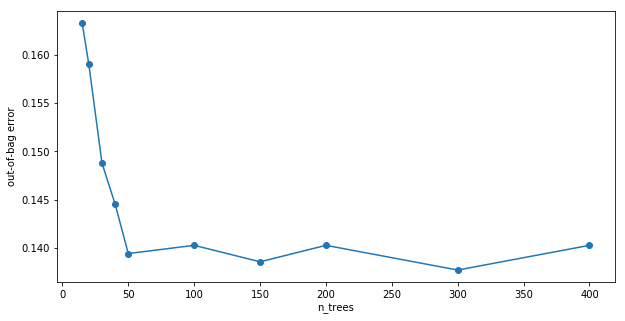

In [22]:
ax = rf_oob_df.plot(legend=False,marker='o',figsize=(10,5))
ax.set(ylabel='out-of-bag error')

### Step11


compare with DecisionTreeClassifier

In [23]:
dtc = tree.DecisionTreeClassifier(max_depth=4,random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [24]:
with open('Dtree.dot','w') as f:
    f = tree.export_graphviz(dtc,out_file=f,max_depth=4,impurity=False,feature_names=X.columns.values,class_names=['Yes','No'],filled=True)

In [25]:
!type Dtree.dot

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="OverTime_No <= 0.5\nsamples = 1176\nvalue = [978, 198]\nclass = Yes", fillcolor="#e58139cb"] ;
1 [label="MonthlyIncome <= 2475.0\nsamples = 339\nvalue = [226, 113]\nclass = Yes", fillcolor="#e581397f"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="DailyRate <= 931.0\nsamples = 63\nvalue = [16, 47]\nclass = No", fillcolor="#399de5a8"] ;
1 -> 2 ;
3 [label="Age <= 36.0\nsamples = 39\nvalue = [4, 35]\nclass = No", fillcolor="#399de5e2"] ;
2 -> 3 ;
4 [label="samples = 32\nvalue = [1, 31]\nclass = No", fillcolor="#399de5f7"] ;
3 -> 4 ;
5 [label="samples = 7\nvalue = [3, 4]\nclass = No", fillcolor="#399de540"] ;
3 -> 5 ;
6 [label="YearsInCurrentRole <= 2.5\nsamples = 24\nvalue = [12, 12]\nclass = Yes", fillcolor="#e5813900"] ;
2 -> 6 ;
7 [label="samples = 17\nvalue = [5, 12]\nclass = No", fillcolor="#399de595"] ;
6 -> 7 ;
8 [label="samples = 7\nvalue = [7, 0]\nclass = Yes", fillcolor="#e5813

In [26]:
accuracy_score(y_test, y_pred)

0.8537414965986394

In [27]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

         No       0.87      0.98      0.92       255
        Yes       0.25      0.05      0.09        39

avg / total       0.79      0.85      0.81       294

